In [1]:
import regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xArr, yArr = regression.loadDataSet('ex0.txt')
print(xArr[:2])

[[1.0, 0.067732], [1.0, 0.42781]]


# fitting line

In [3]:
ws = regression.standRegres(xArr, yArr)
print(ws)

[[ 3.00774324]
 [ 1.69532264]]


# predict

In [4]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat*ws

# plot

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

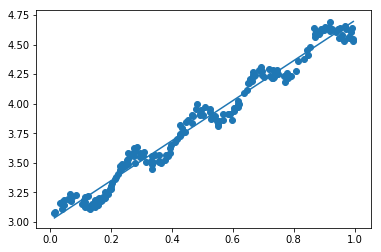

In [6]:
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:,1], yHat)
plt.show()

# correlation coefficient

In [7]:
yHat = xMat*ws
corrcoef = np.corrcoef(yHat.T, yMat)
print(corrcoef)

[[ 1.          0.98647356]
 [ 0.98647356  1.        ]]


# locally weighted linear regression

In [8]:
print(yArr[0])
lwlr = regression.lwlr(xArr[0], xArr, yArr, 1.0)
print(lwlr)
yHat = regression.lwlrTest(xArr, xArr, yArr, 0.003)

3.176513
[[ 3.12204471]]


# fitting plot

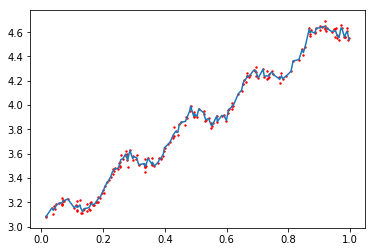

In [9]:
xMat = np.mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

# load abalone dataset

In [10]:
abX, abY = regression.loadDataSet('abalone.txt')
yHat01 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

# predict error

In [11]:
print(regression.rssError(abY[0:99], yHat01.T))
print(regression.rssError(abY[0:99], yHat1.T))
print(regression.rssError(abY[0:99], yHat10.T))

56.7842091184
429.89056187
549.118170883


# test error

In [12]:
yHat01 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
print(regression.rssError(abY[100:199], yHat01.T))
yHat1 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
print(regression.rssError(abY[100:199], yHat1.T))
yHat10 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
print(regression.rssError(abY[100:199], yHat10.T))

25119.4591112
573.52614419
517.571190538


# linear regression predict error

In [13]:
ws = regression.standRegres(abX[0:99], abY[0:99])
yHat = np.mat(abX[100:199])*ws
regression.rssError(abY[100:199], yHat.T.A)

518.63631532464512

# ridge regression test

[[  4.30441949e-02  -2.27416346e-02   1.32140875e-01   2.07518171e-02
    2.22403745e+00  -9.98952980e-01  -1.17254237e-01   1.66229222e-01]
 [  4.30441928e-02  -2.27416370e-02   1.32140878e-01   2.07518175e-02
    2.22403626e+00  -9.98952746e-01  -1.17254174e-01   1.66229339e-01]
 [  4.30441874e-02  -2.27416435e-02   1.32140885e-01   2.07518187e-02
    2.22403305e+00  -9.98952110e-01  -1.17254003e-01   1.66229656e-01]
 [  4.30441725e-02  -2.27416613e-02   1.32140904e-01   2.07518218e-02
    2.22402431e+00  -9.98950381e-01  -1.17253537e-01   1.66230518e-01]
 [  4.30441321e-02  -2.27417096e-02   1.32140956e-01   2.07518304e-02
    2.22400054e+00  -9.98945682e-01  -1.17252271e-01   1.66232862e-01]
 [  4.30440221e-02  -2.27418409e-02   1.32141096e-01   2.07518537e-02
    2.22393595e+00  -9.98932910e-01  -1.17248829e-01   1.66239232e-01]
 [  4.30437233e-02  -2.27421979e-02   1.32141478e-01   2.07519172e-02
    2.22376039e+00  -9.98898194e-01  -1.17239474e-01   1.66256548e-01]
 [  4.3042911

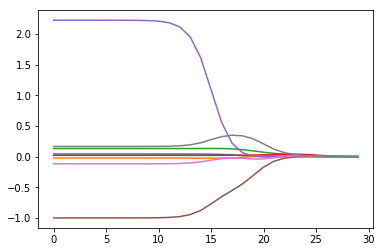

In [14]:
abX, abY = regression.loadDataSet('abalone.txt')
ridgeWeights = regression.ridgeTest(abX, abY)
print(ridgeWeights)

#plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

# forward stage regression

In [15]:
xArr, yArr = regression.loadDataSet('abalone.txt')
regression.stageWise(xArr, yArr, 0.01, 200)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.    0.    0.    0.01  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.02  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.03  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.04  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.05  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.06  0.    0.    0.    0.  ]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.  ]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.01]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.02]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.03]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.04]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.05]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.06]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.07]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.08]]
[[ 0.    0.    0.01  0.05  0.    0.    0.    0.08]]
[[ 0.    0.    0.01  0.05  0.    0.    0.    0.09]]
[[ 0.    0.    0.01  0.05  0.    0.    0.    0.1 ]]
[[ 0.    0.    0.01  0.05  0

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

# least square 

In [16]:
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
xMat = regression.regularize(xMat)
yM = np.mean(yMat, 0)
yMat = yMat - yM
weights = regression.standRegres(xMat, yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

# google api lego price

In [17]:
lgX = []; lgY = []
regression.setDataCollect(lgX, lgY)

HTTPError: HTTP Error 404: Not Found

# modeling 

In [ ]:
np.shape(lgX)
lgX1 = np.mat(np.ones((58,5)))
lgX1[:,1:5] = np.mat(lgX)

ws = regression.standRegres(lgX1, lgY)
print(ws)
pred = lgX1[0]*ws
print(pred)

# cross validation test ridge regression

In [ ]:
regression.crossValidation(lgX, lgY, 10)

In [ ]:
regression.ridgeTest(lgX, lgY)